In [1]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading dataset
df = pd.read_csv("/kaggle/input/house-price-india/House Price India.csv/House Price India.csv")

df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [3]:
target = "Price"
features = [i for i in df.columns if i!=target]

# print("Target:\n",target)
# print("Features:",*features,sep="\n ")

In [4]:
df.nunique().sort_values()

waterfront present                           2
Number of schools nearby                     3
number of views                              5
condition of the house                       5
number of floors                             6
grade of the house                          10
number of bedrooms                          12
number of bathrooms                         29
Distance from the airport                   31
Renovation Year                             68
Postal Code                                 70
Built Year                                 116
Date                                       241
Area of the basement                       280
living_area_renov                          665
Longitude                                  716
Area of the house(excluding basement)      781
living area                                865
Price                                     2901
Lattitude                                 4662
lot_area_renov                            6835
lot area     

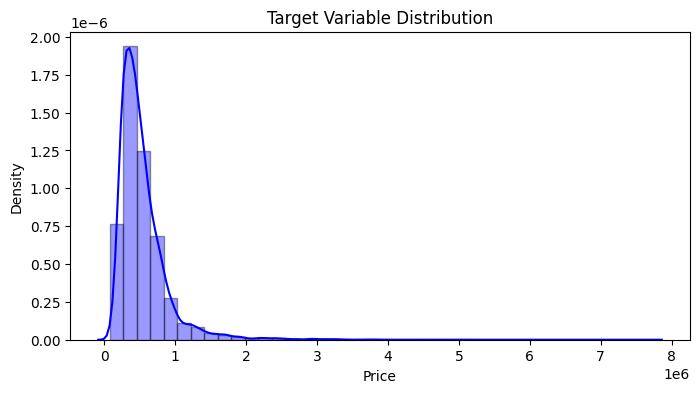

In [5]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='b',hist_kws=dict(edgecolor="black", linewidth=1), bins=40)
plt.title('Target Variable Distribution')
plt.show()

In [6]:
#Removal of outlier:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = df1.columns

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(2*IQR))]
    df1 = df1[df1[i] >= (Q1-(2*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
1,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
2,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
3,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000
4,6762815461,42491,4,2.00,1520,6200,1.5,0,0,3,...,1945,0,122006,52.9080,-114.459,1910,6200,3,80,640000



Inference:
Before removal of outliers, The dataset had 14620 samples.
After removal of outliers, The dataset now has 10641 samples.


In [7]:
df = df1.copy()

In [8]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (10641, 22) (10641,) 
Training set  --->  (8512, 22) (8512,) 
Testing set   --->  (2129, 22)  (2129,)


In [9]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,id,Date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,Area_of_the_basement,Built_Year,Renovation_Year,Postal_Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number_of_schools_nearby,Distance_from_the_airport
count,8.512000e+03,8.512000e+03,8.512000e+03,8.512000e+03,8.512000e+03,8.512000e+03,8.512000e+03,8512.0,8512.0,8.512000e+03,...,8.512000e+03,8.512000e+03,8512.0,8.512000e+03,8.512000e+03,8.512000e+03,8.512000e+03,8.512000e+03,8.512000e+03,8.512000e+03
mean,6.689951e-11,-3.987005e-14,-1.227089e-16,2.337312e-17,-3.109459e-17,-8.431017e-17,1.097702e-16,0.0,0.0,-1.665335e-16,...,-8.347542e-18,-3.564609e-15,0.0,-1.825858e-13,-6.351102e-14,-1.236338e-13,1.544295e-17,-1.456646e-16,-2.984246e-17,-6.986892e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,0.0,0.0,1.000059e+00,...,1.000059e+00,1.000059e+00,0.0,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.936808e+00,-1.697187e+00,-2.715165e+00,-2.226018e+00,-2.246741e+00,-1.876735e+00,-8.822461e-01,0.0,0.0,-3.671016e+00,...,-6.390612e-01,-2.400979e+00,0.0,-1.546240e+00,-2.670037e+00,-1.935949e+00,-2.233603e+00,-2.083185e+00,-1.236670e+00,-1.678962e+00
25%,-8.401988e-01,-8.790650e-01,-3.276150e-01,-7.338253e-01,-7.551587e-01,-6.839605e-01,-8.822461e-01,0.0,0.0,-6.446055e-01,...,-6.390612e-01,-6.848425e-01,0.0,-8.682940e-01,-6.251094e-01,-8.266252e-01,-7.302283e-01,-7.082652e-01,-1.236670e+00,-8.947093e-01
50%,6.206775e-02,-7.581816e-02,-3.276150e-01,1.227133e-02,-1.159092e-01,-2.099573e-03,-8.822461e-01,0.0,0.0,-6.446055e-01,...,-6.390612e-01,1.227512e-01,0.0,-8.604825e-02,8.755488e-02,-2.561159e-01,-1.919830e-01,8.706107e-02,-1.251195e-02,1.579456e-03
75%,8.560289e-01,8.613031e-01,8.661602e-01,7.583679e-01,6.451021e-01,5.649164e-01,9.424846e-01,0.0,0.0,8.685997e-01,...,6.178082e-01,9.303449e-01,0.0,8.526466e-01,8.659017e-01,6.154955e-01,5.875447e-01,6.094082e-01,1.211646e+00,8.978682e-01
max,1.643917e+00,1.917424e+00,3.253711e+00,2.996658e+00,4.191415e+00,4.111478e+00,3.679581e+00,0.0,0.0,2.381805e+00,...,3.410851e+00,1.468741e+00,0.0,2.052090e+00,1.540087e+00,3.578974e+00,3.353012e+00,3.379712e+00,1.211646e+00,1.682121e+00



                                          Standardardization on Testing set                                          


,id,Date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,Area_of_the_basement,Built_Year,Renovation_Year,Postal_Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number_of_schools_nearby,Distance_from_the_airport
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.0,2129.0,2129.000000,...,2129.000000,2129.000000,2129.0,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,0.012917,0.010294,0.006014,0.041183,0.010315,-0.006783,-0.011021,0.0,0.0,0.052649,...,0.043280,0.040231,0.0,0.002207,0.004651,-0.006792,-0.028122,-0.013472,0.015088,-0.020891
std,0.983961,1.006325,0.979527,0.961968,0.987880,1.008547,1.001415,0.0,0.0,1.021100,...,1.031114,0.979334,0.0,1.005189,1.006569,0.989262,0.990152,1.004859,1.005930,1.005822
min,-1.935928,-1.697187,-2.715165,-2.226018,-2.018438,-1.832196,-0.882246,0.0,0.0,-3.671016,...,-0.639061,-2.400979,0.0,-1.546240,-2.640686,-1.444677,-2.140802,-2.050378,-1.236670,-1.678962
25%,-0.784660,-0.893940,-0.327615,-0.733825,-0.724718,-0.681034,-0.882246,0.0,0.0,-0.644605,...,-0.639061,-0.583893,0.0,-0.868294,-0.631194,-0.850396,-0.748789,-0.708265,-1.236670,-0.894709
50%,0.041120,-0.031193,-0.327615,0.012271,-0.131129,-0.026653,-0.882246,0.0,0.0,-0.644605,...,-0.639061,0.156401,0.0,-0.086048,0.095430,-0.240268,-0.229103,0.087061,-0.012512,-0.110457
75%,0.856689,0.861303,0.866160,0.758368,0.629882,0.552925,0.942485,0.0,0.0,0.868600,...,0.757460,0.930345,0.0,0.852647,0.879325,0.615496,0.513304,0.602366,1.211646,0.897868
max,1.643037,1.917424,3.253711,2.996658,4.130534,4.026112,3.679581,0.0,0.0,2.381805,...,3.466712,1.468741,0.0,2.052090,1.533644,3.563127,3.353012,3.308464,1.211646,1.682121


Dropped Features -->  ['Area_of_the_house(excluding_basement)', 'living_area', 'lot_area_renov', 'id', 'number_of_bathrooms', 'grade_of_the_house', 'number_of_floors', 'Built_Year', 'living_area_renov', 'Lattitude', 'Longitude', 'Area_of_the_basement', 'lot_area']


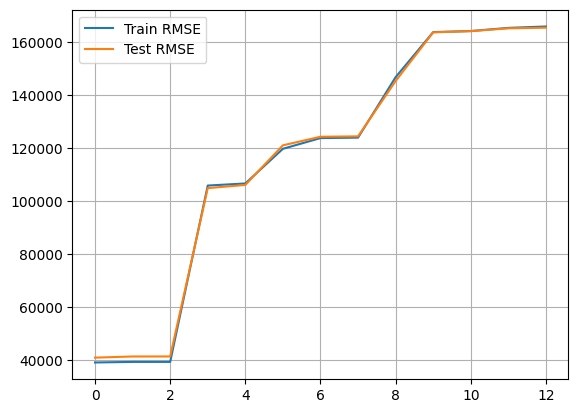

In [10]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

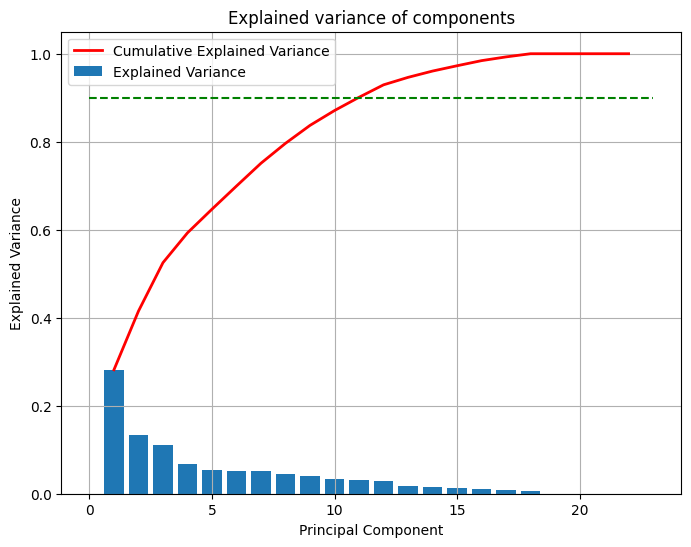

In [11]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [12]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=6

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    # X_poly1 = poly_reg.fit_transform(Test_X_std[:500])
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    # pred2 = LR.predict(X_poly1)
    # Tss.append(np.sqrt(mean_squared_error(Test_Y[:500], pred2)))

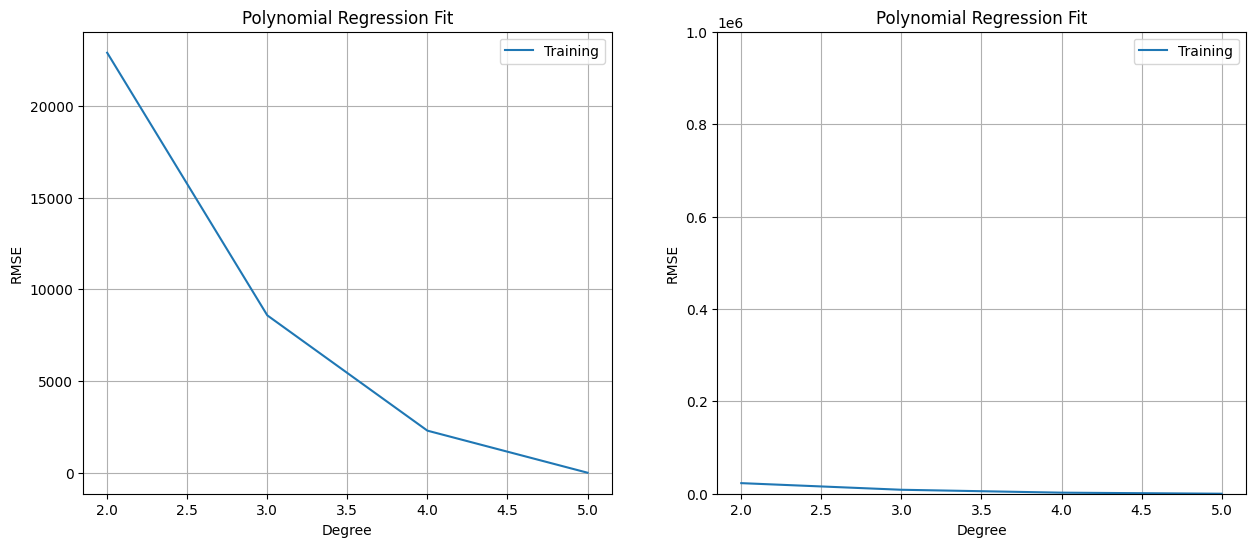

In [13]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
# plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
# plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,1e6])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

In [14]:


#Using the 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>



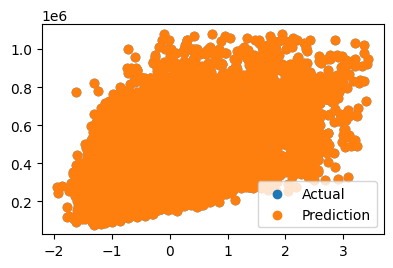



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 2.76525e-14
Mean Squared Error (MSE) on Training set       ---> 3.25e-18
Root Mean Squared Error (RMSE) on Training set ---> 1.80240072953e-09

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9498398004178527
Residual Sum of Squares (RSS) on Training set  ---> 3609425122557.218
Mean Squared Error (MSE) on Training set       ---> 1695361729.7121737
Root Mean Squared Error (RMSE) on Training set ---> 41174.770548385255

--------------------Residual Plots--------------------


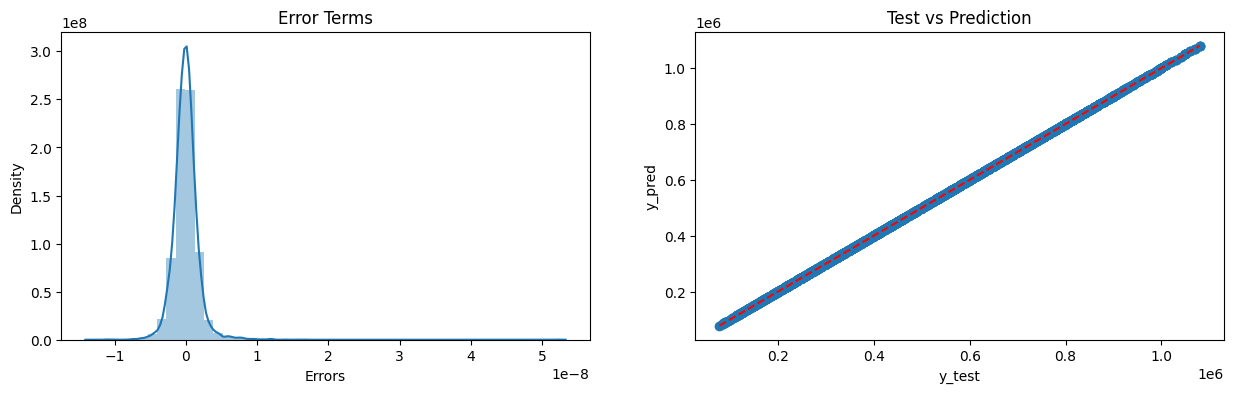

In [15]:
print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
#Plotting predicted predicteds alongside the actual datapoints 
plt.figure(figsize=[15,6])
for e,i in enumerate(rc):
    plt.subplot(2,3,e+1)
    plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
    plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
    plt.legend()
plt.show()

#Evaluating the Multiple Linear Regression Model

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.distplot((Train_Y - pred1))
plt.title('Error Terms')          
plt.xlabel('Errors') 

plt.subplot(1,2,2)
plt.scatter(Train_Y,pred1)
plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
plt.title('Test vs Prediction')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred')                       
plt.show()

In [16]:
import pickle

#exporting model
with open("House_Price_Prediction.h5","wb") as file:
    pickle.dump(PR,file)